### DAB 303 Marketing Analytics (Section- 005)

### Dhrumi Patel (0793770)

### Analysis on Customer Reviews and Ratings From Adidas Dataset

In [ ]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns #visualization
sns.set()
from datetime import datetime

In [3]:
df = pd.read_csv("C:/SEM 3/DAB 303(Marketing)/Final Project/adidas_usa.csv") # reading dataset

In [4]:
df.head()    # First 5 records in the DataFrame

,url,name,sku,selling_price,original_price,currency,availability,color,category,source,source_website,breadcrumbs,description,brand,images,country,language,average_rating,reviews_count,crawled_at
0,https://www.adidas.com/us/beach-shorts/FJ5089....,Beach Shorts,FJ5089,40,NaN,USD,InStock,Black,Clothing,adidas United States,https://www.adidas.com,Women/Clothing,Splashing in the surf. Making memories with yo...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.5,35,2021-10-23 17:50:17.331255
1,https://www.adidas.com/us/five-ten-kestrel-lac...,Five Ten Kestrel Lace Mountain Bike Shoes,BC0770,150,NaN,USD,InStock,Grey,Shoes,adidas United States,https://www.adidas.com,Women/Shoes,Lace up and get after it. The Five Ten Kestrel...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.8,4,2021-10-23 17:50:17.423830
2,https://www.adidas.com/us/mexico-away-jersey/G...,Mexico Away Jersey,GC7946,70,NaN,USD,InStock,White,Clothing,adidas United States,https://www.adidas.com,Kids/Clothing,"Clean and crisp, this adidas Mexico Away Jerse...",adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.9,42,2021-10-23 17:50:17.530834
3,https://www.adidas.com/us/five-ten-hiangle-pro...,Five Ten Hiangle Pro Competition Climbing Shoes,FV4744,160,NaN,USD,InStock,Black,Shoes,adidas United States,https://www.adidas.com,Five Ten/Shoes,The Hiangle Pro takes on the classic shape of ...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,3.7,7,2021-10-23 17:50:17.615054
4,https://www.adidas.com/us/mesh-broken-stripe-p...,Mesh Broken-Stripe Polo Shirt,GM0239,65,NaN,USD,InStock,Blue,Clothing,adidas United States,https://www.adidas.com,Men/Clothing,Step up to the tee relaxed. This adidas golf p...,adidas,"https://assets.adidas.com/images/w_600,f_auto,...",USA,en,4.7,11,2021-10-23 17:50:17.702680


In [5]:
df.info()   # Information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             845 non-null    object 
 1   name            845 non-null    object 
 2   sku             845 non-null    object 
 3   selling_price   845 non-null    int64  
 4   original_price  829 non-null    object 
 5   currency        845 non-null    object 
 6   availability    845 non-null    object 
 7   color           845 non-null    object 
 8   category        845 non-null    object 
 9   source          845 non-null    object 
 10  source_website  845 non-null    object 
 11  breadcrumbs     845 non-null    object 
 12  description     845 non-null    object 
 13  brand           845 non-null    object 
 14  images          845 non-null    object 
 15  country         845 non-null    object 
 16  language        845 non-null    object 
 17  average_rating  845 non-null    flo

In [6]:
df.shape ## Shape of the DataFrame

(845, 20)

In [7]:
df.isna().sum() #Checking for Null Values in the DataFrame


url                0
name               0
sku                0
selling_price      0
original_price    16
currency           0
availability       0
color              0
category           0
source             0
source_website     0
breadcrumbs        0
description        0
brand              0
images             0
country            0
language           0
average_rating     0
reviews_count      0
crawled_at         0
dtype: int64

In [8]:
# Correlation Between Columns

df.corr()

,selling_price,average_rating,reviews_count
selling_price,1.000000,-0.213004,0.102654
average_rating,-0.213004,1.000000,0.023585
reviews_count,0.102654,0.023585,1.000000


In [9]:
# Statistical informtion about the DataFrame

df.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,845.0,53.192899,31.411645,9.0,28.0,48.0,70.0,240.0
average_rating,845.0,4.608402,0.293795,1.0,4.5,4.7,4.8,5.0
reviews_count,845.0,426.178698,1229.158277,1.0,19.0,68.0,314.0,11750.0


In [10]:
# The Percentage of Missing Values in the 'original_price' Column

100 * (df['original_price'].isna().sum() / len(df))

# As the percntage of Null Records is less than 5%, hence dropping the Null record Rows

1.8934911242603552

In [11]:
# Dropping Null Values in the DataFrame

df.dropna(inplace=True, axis=0)

In [12]:
# Checking for Null Values in the DataFrame

df.isna().sum()

url               0
name              0
sku               0
selling_price     0
original_price    0
currency          0
availability      0
color             0
category          0
source            0
source_website    0
breadcrumbs       0
description       0
brand             0
images            0
country           0
language          0
average_rating    0
reviews_count     0
crawled_at        0
dtype: int64

In [13]:
# Dropping 'currency' column as all records have 'USD' as currency
# Dropping 'source' column as all records have 'adidas United States' as value
# Dropping 'brand', 'country', 'language' columns as all records have same value

df.drop([ 'brand', 'country', 'language', 'source_website', 'images', 'crawled_at', 'url', 'sku', 'currency','source', 'description'], axis=1, inplace=True)

In [14]:
# First 5 records in the DataFrame

df.head()

,name,selling_price,original_price,availability,color,category,breadcrumbs,average_rating,reviews_count
15,Essentials Loose Logo Tank Top,20,$25,InStock,Purple,Clothing,Women/Clothing,4.8,116
16,Essentials Loose Logo Tank Top,20,$25,InStock,Pink,Clothing,Women/Clothing,4.8,116
18,Essentials Loose Logo Tank Top,20,$25,InStock,Green,Clothing,Women/Clothing,4.8,116
19,Formotion Sculpt Tights,48,$80,InStock,Blue,Clothing,Women/Clothing,4.2,144
20,Marvel X Ghosted.3 Firm Ground Cleats,64,$80,InStock,Blue,Shoes,Soccer/Shoes,4.4,160


In [15]:
df.shape # Shape of the DataFrame

(829, 9)

In [16]:
df.dtypes # Checking the Data Types for the columns

name               object
selling_price       int64
original_price     object
availability       object
color              object
category           object
breadcrumbs        object
average_rating    float64
reviews_count       int64
dtype: object

In [17]:
# Removing '$' from the DataFrame

df['original_price'] = df['original_price'].str.split('$')

df['original_price'] = df['original_price'].str[1]

In [18]:
df.head() # First 5 records in the DataFrame

,name,selling_price,original_price,availability,color,category,breadcrumbs,average_rating,reviews_count
15,Essentials Loose Logo Tank Top,20,25,InStock,Purple,Clothing,Women/Clothing,4.8,116
16,Essentials Loose Logo Tank Top,20,25,InStock,Pink,Clothing,Women/Clothing,4.8,116
18,Essentials Loose Logo Tank Top,20,25,InStock,Green,Clothing,Women/Clothing,4.8,116
19,Formotion Sculpt Tights,48,80,InStock,Blue,Clothing,Women/Clothing,4.2,144
20,Marvel X Ghosted.3 Firm Ground Cleats,64,80,InStock,Blue,Shoes,Soccer/Shoes,4.4,160


In [19]:
# Changing the DataType of 'original_price' from object to int64

df['original_price'] = df['original_price'].astype('int64')

In [20]:
df.dtypes

name               object
selling_price       int64
original_price      int64
availability       object
color              object
category           object
breadcrumbs        object
average_rating    float64
reviews_count       int64
dtype: object

  # Data Visualization 

# Heat-Map

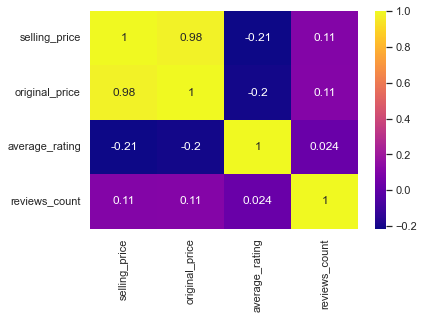

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show();

# Average Rating

In [22]:
# Unique 'Average Rating'in the DataFrame

df['average_rating'].unique()

array([4.8, 4.2, 4.4, 4.5, 4.6, 5. , 4.7, 4.3, 4. , 4.9, 3.9, 3.7, 3. ,
       4.1, 1. , 3.8])

In [23]:
# No.of Unique 'Average Rating'in the DataFrame

df['average_rating'].nunique()

16

In [24]:
# No.of time particular Average Rating Provided

df['average_rating'].value_counts()

4.8    161
4.7    159
4.6    120
4.5     99
5.0     70
4.2     51
4.4     49
4.9     44
4.3     29
3.9     14
4.1     14
4.0     12
3.7      4
3.0      1
1.0      1
3.8      1
Name: average_rating, dtype: int64

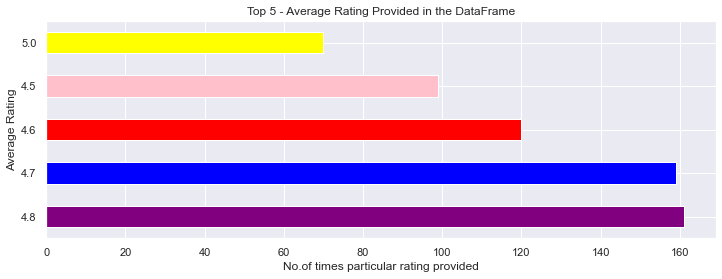

In [25]:
# Top 5 - Average Rating Provided

plt.figure(figsize=(12,4))
df['average_rating'].value_counts().head(5).plot(kind='barh',color={'red','yellow','blue','pink','purple'})
plt.ylabel("Average Rating")
plt.xlabel("No.of times particular rating provided")
plt.title("Top 5 - Average Rating Provided in the DataFrame")
plt.show();

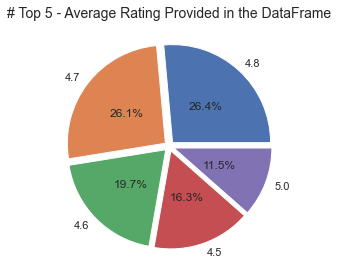

In [26]:
# Top 5 - Average Rating Provided

labels = df['average_rating'].value_counts().head(5).index
pie, ax = plt.subplots(figsize=[10,4])
plt.pie(x=df['average_rating'].value_counts().head(5).values, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("# Top 5 - Average Rating Provided in the DataFrame", fontsize=14);
plt.tight_layout();

In [27]:
# Maxmimum Average Rating

df['average_rating'].max()

5.0

In [28]:
# Minimum Average Rating

df['average_rating'].min()

1.0

In [29]:
# Mean Average Rating

round(df['average_rating'].mean(),2)

4.61

#### The **Maximum** Average Rating among all products is '**5.0**' and **Minimum** Average Rating among all products is '**1.0**'

# Reviews Count

In [30]:
# No.of Unique 'Reviews Count' in the DataFrame

df['reviews_count'].nunique()

211

In [31]:
# Top 10 - 'Reviews Count' and no.of particular 'Reviews Count' occurances

df['reviews_count'].value_counts().head(10)

1      23
2      21
5      15
9      15
4      14
8      14
3      13
562    12
51     12
454    12
Name: reviews_count, dtype: int64

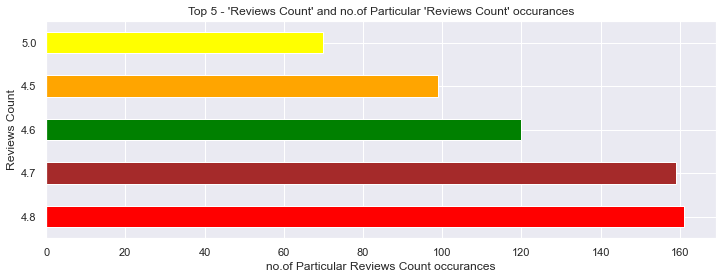

In [32]:
# Top 5 - 'Reviews Count' and no.of particular 'Reviews Count' occurances

plt.figure(figsize=(12,4))
df['average_rating'].value_counts().head(5).plot(kind='barh', color={'green','red','yellow', 'brown', 'orange'})
plt.ylabel('Reviews Count')
plt.xlabel('no.of Particular Reviews Count occurances')
plt.title("Top 5 - 'Reviews Count' and no.of Particular 'Reviews Count' occurances")
plt.show();

In [33]:
# Maxmimum 'Reviews Count'

df['reviews_count'].max()

11750

In [34]:
# Minimum 'Reviews Count'

df['reviews_count'].min()

1

In [35]:
# Mean 'Reviews Count'

round(df['reviews_count'].mean(),2)

433.94

#### The **Maximum** 'Reviews Count' among all products is '**11750**' and **Minimum** 'Reviews Count' among all products is '**1**'

# Reviews Count Vs. Average Rating

<AxesSubplot:xlabel='average_rating', ylabel='reviews_count'>

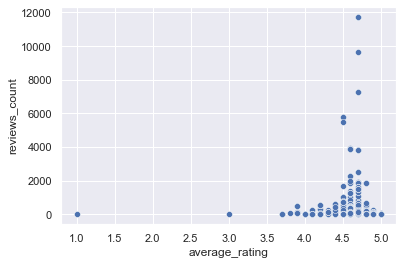

In [36]:
sns.scatterplot(data=df, x='average_rating', y='reviews_count')

#### The Correlation Between Reviews Count & Average Rating is '**0.024**' (positive correlation), from the graph we may can conclude that there are more number of reviews when particular product rated above **3.5** 